# [ATM 623: Climate Modeling](../index.ipynb)
[Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany
# Lecture 13: Heat transport

## Contents

1. [First section title](#section1)

____________
<a id='section1'></a>

## 1. Spatial patterns of insolation and surface temperature
____________

Some text.

In [1]:
#  load surface temperature data.
#  See that annual mean it is highly correlated 

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import climlab
from climlab import constants as const

In [3]:
#  Calculate daily average insolation as function of latitude and time of year
lat = np.linspace( -90., 90., 500. )
days = np.linspace(0, const.days_per_year, 365. )
Q = climlab.solar.insolation.daily_insolation( lat, days )

In [4]:
#  daily surface temperature from  NCEP reanalysis
ncep_url = "http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/"
ncep_temp = nc.Dataset( ncep_url + "surface_gauss/skt.sfc.day.1981-2010.ltm.nc" )
lat_ncep = ncep_temp.variables['lat'][:]
lon_ncep = ncep_temp.variables['lon'][:]
time_ncep = ncep_temp.variables['time'][:]
ncep_temp_zon = np.mean(ncep_temp.variables['skt'][:], axis=2)

/Users/Brian/anaconda/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/Brian/anaconda/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


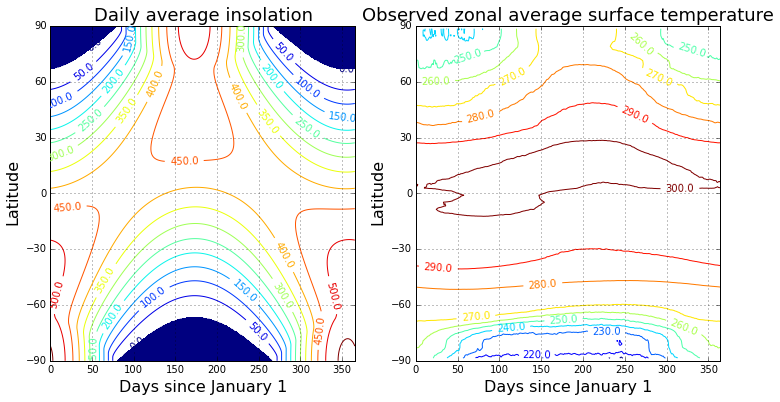

In [5]:
fig = plt.figure(figsize=(12,6))

ax1 = fig.add_subplot(121)
CS = ax1.contour( days, lat, Q , levels = np.arange(0., 600., 50.) )
ax1.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax1.set_title('Daily average insolation', fontsize=18 )
ax1.contourf ( days, lat, Q, levels=[0., 0.] )

ax2 = fig.add_subplot(122)
CS = ax2.contour( (time_ncep - time_ncep[0])/const.hours_per_day, lat_ncep, 
                 ncep_temp_zon.T, levels=np.arange(210., 310., 10. ) )
ax2.clabel(CS, CS.levels, inline=True, fmt='%r', fontsize=10)
ax2.set_title('Observed zonal average surface temperature', fontsize=18 )

for ax in [ax1,ax2]:
    ax.set_xlabel('Days since January 1', fontsize=16 )
    ax.set_ylabel('Latitude', fontsize=16 )
    ax.set_yticks([-90,-60,-30,0,30,60,90])
    ax.grid()

____________
<a id='section2'></a>

## 2. Calculating Radiative-Convective Equilibrium as a function of latitude
____________

Let's use the `climlab.BandRCModel` to calculate a radiative-convective equilibrium state for every latitude band.

In [6]:
#  Create a model with both latitude and pressure dimensions
model = climlab.BandRCModel(num_lev=30, num_lat=90)
print model

climlab Process of type <class 'climlab.model.column.BandRCModel'>. 
State variables and domain shapes: 
  Tatm: (90, 30) 
  q: (90, 30) 
  Ts: (90, 1) 
The subprocess tree: 
top: <class 'climlab.model.column.BandRCModel'>
   LW: <class 'climlab.radiation.nband.FourBandLW'>
   H2O: <class 'climlab.radiation.water_vapor.ManabeWaterVapor'>
   insolation: <class 'climlab.radiation.insolation.FixedInsolation'>
   convective adjustment: <class 'climlab.convection.convadj.ConvectiveAdjustment'>
   SW: <class 'climlab.radiation.nband.ThreeBandSW'>
   surface: <class 'climlab.surface.surface_radiation.SurfaceRadiation'>



In [7]:
model.compute_diagnostics()

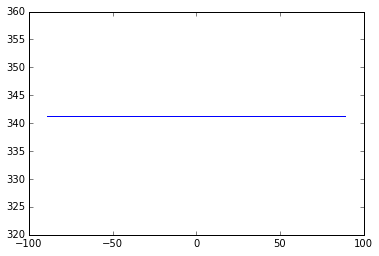

In [8]:
plt.plot(model.lat, model.diagnostics['insolation'])

In [9]:
#  Change the insolation process to use actual daily insolation as a function of latitude and time of year
model = climlab.BandRCModel(num_lev=30, num_lat=90, adj_lapse_rate=6.)
insolation = climlab.radiation.insolation.DailyInsolation(domains=model.Ts.domain)
model.add_subprocess('insolation', insolation)
print model

climlab Process of type <class 'climlab.model.column.BandRCModel'>. 
State variables and domain shapes: 
  Tatm: (90, 30) 
  q: (90, 30) 
  Ts: (90, 1) 
The subprocess tree: 
top: <class 'climlab.model.column.BandRCModel'>
   LW: <class 'climlab.radiation.nband.FourBandLW'>
   H2O: <class 'climlab.radiation.water_vapor.ManabeWaterVapor'>
   insolation: <class 'climlab.radiation.insolation.DailyInsolation'>
   convective adjustment: <class 'climlab.convection.convadj.ConvectiveAdjustment'>
   SW: <class 'climlab.radiation.nband.ThreeBandSW'>
   surface: <class 'climlab.surface.surface_radiation.SurfaceRadiation'>



In [10]:
#  model is initialized on Jan. 1

#  integrate forward just under 1/4 year... should get about to the NH spring equinox
model.integrate_days(31+28+22)
Q_spring = model.diagnostics['insolation']
#  Then forward to NH summer solstice
model.integrate_days(31+30+31)
Q_summer = model.diagnostics['insolation']
#  and on to autumnal equinox
model.integrate_days(30+31+33)
Q_fall = model.diagnostics['insolation']
#  and finally to NH winter solstice
model.integrate_days(30+31+30)
Q_winter = model.diagnostics['insolation']

Integrating for 81 steps, 81.0 days, or 0.221770649722 years.
Total elapsed time is 0.221770649722 years.
Integrating for 91 steps, 92.0 days, or 0.251887651536 years.
Total elapsed time is 0.470920392003 years.
Integrating for 94 steps, 94.0 days, or 0.257363470048 years.
Total elapsed time is 0.728283862051 years.
Integrating for 91 steps, 91.0 days, or 0.249149742281 years.
Total elapsed time is 0.977433604332 years.


/Users/Brian/climlab/climlab/model/column.py:129: RuntimeWarning: divide by zero encountered in divide
  SW.flux_from_space)


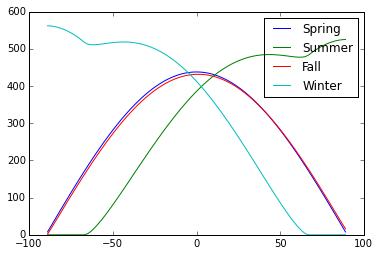

In [11]:
plt.plot(model.lat, Q_spring, label='Spring')
plt.plot(model.lat, Q_summer, label='Summer')
plt.plot(model.lat, Q_fall, label='Fall')
plt.plot(model.lat, Q_winter, label='Winter')
plt.legend()

In [12]:
#  We want to integrate this model out to quasi-equilibrium (steady annual cycle)

#  But first add some ozone

In [13]:
#  Put in some ozone

datapath = "http://ramadda.atmos.albany.edu:8080/repository/opendap/latest/Top/Users/Brian+Rose/CESM+runs/"
endstr = "/entry.das"

topo = nc.Dataset( datapath + 'som_input/USGS-gtopo30_1.9x2.5_remap_c050602.nc' + endstr )
ozone = nc.Dataset( datapath + 'som_input/ozone_1.9x2.5_L26_2000clim_c091112.nc' + endstr )

#  Dimensions of the ozone file
lat = ozone.variables['lat'][:]
lon = ozone.variables['lon'][:]
lev = ozone.variables['lev'][:]

# Taking annual, zonal average of the ozone data
O3_zon = np.mean( ozone.variables['O3'],axis=(0,3) )

In [14]:
#  make a new model on the same grid as the ozone data!
model = climlab.BandRCModel(lat=lat, lev=lev)
insolation = climlab.radiation.insolation.DailyInsolation(domains=model.Ts.domain)
model.add_subprocess('insolation', insolation)

In [15]:
#  Set the ozone mixing ratio
#   IMPORTANT: we need to flip the ozone array around because the vertical coordinate runs the wrong way
#   (first element is top of atmosphere, whereas our model expects the first element to be just above the surface)
O3_trans = np.transpose(O3_zon)
O3_flipped = np.fliplr(O3_trans)

model.absorber_vmr['O3'] = O3_flipped

In [16]:
model.integrate_years(2.)

Integrating for 730 steps, 730.4844 days, or 2.0 years.
Total elapsed time is 1.99867375676 years.


In [17]:
model.integrate_years(1.)

Integrating for 365 steps, 365.2422 days, or 1.0 years.
Total elapsed time is 2.99801063513 years.


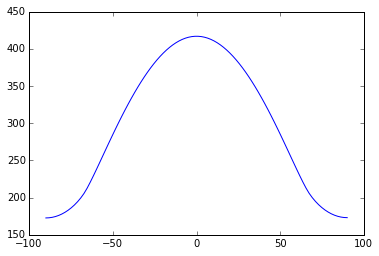

In [18]:
plt.plot(model.lat, model.timeave['insolation'])

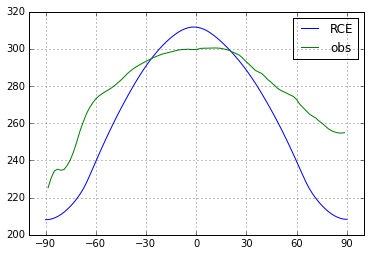

In [19]:
# Plot annual mean surface temperature in the model,
#   compare to observed annual mean surface temperatures
plt.plot(model.lat, model.timeave['Ts'], label='RCE')
plt.plot(lat_ncep, np.mean(ncep_temp_zon, axis=0), label='obs')
plt.xticks(range(-90,100,30))
plt.grid()
plt.legend()

In [20]:
#  Observed air temperature from NCEP reanalysis

ncep_air = nc.Dataset( ncep_url + "pressure/air.mon.1981-2010.ltm.nc" )
level_ncep_air = ncep_air.variables['level'][:]
lat_ncep_air = ncep_air.variables['lat'][:]
Tzon = np.mean(ncep_air.variables['air'],axis=(0,3))

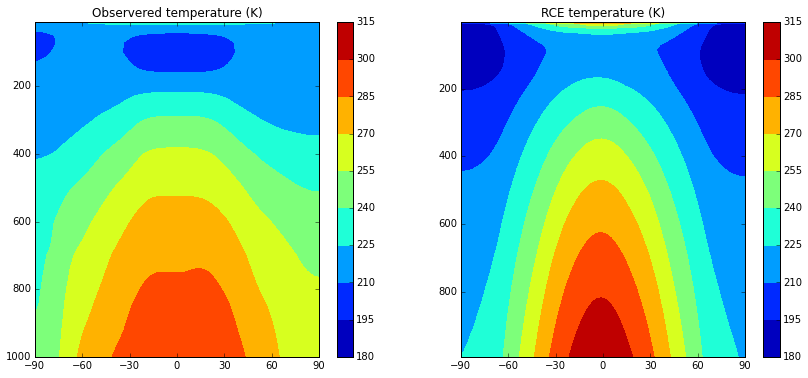

In [21]:
#  Compare temperature profiles in RCE and observations
contours = np.arange(180., 325., 15.)

fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1,2,1)
cax1 = ax1.contourf(lat_ncep_air, level_ncep_air, Tzon+const.tempCtoK, levels=contours)
fig.colorbar(cax1)
ax1.set_title('Observered temperature (K)')

ax2 = fig.add_subplot(1,2,2)
field = model.timeave['Tatm'].transpose()
cax2 = ax2.contourf(model.lat, model.lev, field, levels=contours)
fig.colorbar(cax2)
ax2.set_title('RCE temperature (K)')

for ax in [ax1, ax2]:
    ax.invert_yaxis()
    ax.set_xlim(-90,90)
    ax.set_xticks([-90, -60, -30, 0, 30, 60, 90])

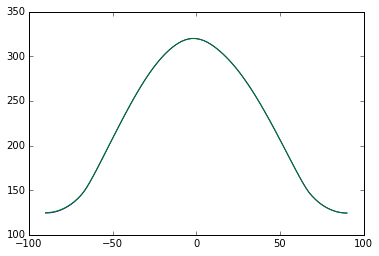

In [22]:
plt.plot(model.lat, model.timeave['ASR'])
plt.plot(model.lat, model.timeave['OLR'])

In [23]:
#  Bug fixed...   Now have TOA energy balance in every column.

____________
<a id='section3'></a>

## 3. Observed and modeled TOA radiation budget
____________


In [24]:
# Get TOA radiative flux data from NCEP reanalysis

# downwelling SW
dswrf = nc.Dataset(ncep_url + '/other_gauss/dswrf.ntat.mon.1981-2010.ltm.nc')
#  upwelling SW
uswrf = nc.Dataset(ncep_url + '/other_gauss/uswrf.ntat.mon.1981-2010.ltm.nc')
#  upwelling LW
ulwrf = nc.Dataset(ncep_url + '/other_gauss/ulwrf.ntat.mon.1981-2010.ltm.nc')

In [25]:
ASR = dswrf.variables['dswrf'][:] - uswrf.variables['uswrf'][:]
OLR = ulwrf.variables['ulwrf'][:]

In [26]:
ASRzon = np.mean(ASR, axis=(0,2))
OLRzon = np.mean(OLR, axis=(0,2))

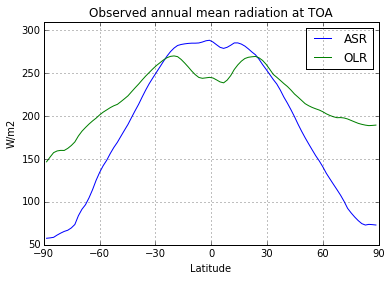

In [27]:
ticks = [-90, -60, -30, 0, 30, 60, 90]

fig, ax = plt.subplots()
ax.plot(lat_ncep, ASRzon, label='ASR')
ax.plot(lat_ncep, OLRzon, label='OLR')
ax.set_ylabel('W/m2')
ax.set_xlabel('Latitude')
ax.set_xlim(-90,90)
ax.set_ylim(50,310)
ax.set_xticks(ticks);
ax.legend()
ax.set_title('Observed annual mean radiation at TOA')
ax.grid()

In [28]:
#  same thing from CESM control simulation
datapath = "http://ramadda.atmos.albany.edu:8080/repository/opendap/latest/Top/Users/Brian+Rose/CESM+runs/"
endstr = "/entry.das"
atm_control = nc.Dataset( datapath + 'som_control/som_control.cam.h0.clim.nc' + endstr )
atm_2xCO2 = nc.Dataset( datapath + 'som_2xCO2/som_2xCO2.cam.h0.clim.nc' + endstr )

In [29]:
lat_cesm = atm_control.variables['lat'][:]
ASR_cesm = atm_control.variables['FSNT'][:]
OLR_cesm = atm_control.variables['FLNT'][:]

In [30]:
ASR_cesm_zon = np.mean(ASR_cesm, axis=(0,2))
OLR_cesm_zon = np.mean(OLR_cesm, axis=(0,2))

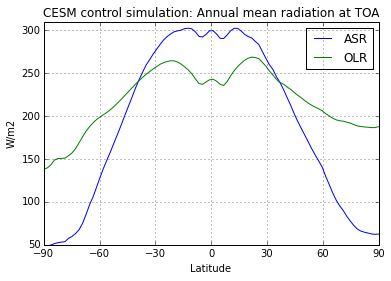

In [31]:
fig, ax = plt.subplots()
ax.plot(lat_cesm, ASR_cesm_zon, label='ASR')
ax.plot(lat_cesm, OLR_cesm_zon, label='OLR')
ax.set_ylabel('W/m2')
ax.set_xlabel('Latitude')
ax.set_xlim(-90,90)
ax.set_ylim(50,310)
ax.set_xticks(ticks);
ax.legend()
ax.set_title('CESM control simulation: Annual mean radiation at TOA')
ax.grid()

____________
<a id='section4'></a>

## 4. The energy budget for a zonal band
____________

Let’s now consider a thin band of the climate system, of width $\delta \phi$ , and write down a careful energy budget for it.


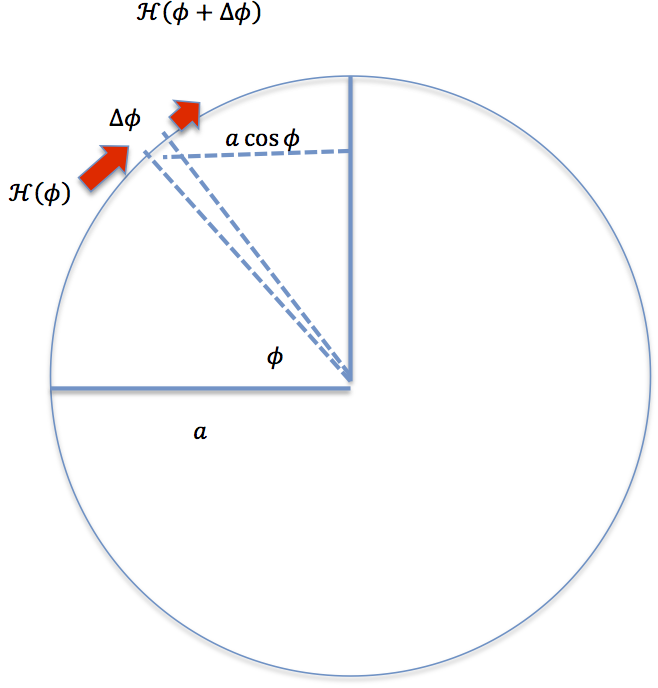

In [32]:
from IPython.display import Image
Image('../images/ZonalEnergyBudget_sketch.png', width=400)

Let $\mathcal{H}(\phi)$ be the total rate of northward energy transport across the latitude line $\phi$, measured in Watts (usually PW).

Let $T(\phi,t)$ be the zonal average surface temperature ("zonal average" = average around latitude circle).

We can write the energy budget as

$$ \frac{\partial E}{\partial t} = \text{energy in} - \text{energy out} $$

where $E$ is the total energy content of the column, which is useful to write as

$$ E = \int_{bottom}^{top} \rho ~ e ~ dz $$

and $e$ is the local **enthalpy** of the fluid, in units of J kg$^{-1}$. The integral energy content $E$ thus has units of J m$^{-2}$.

We have written the time tendency as a partial derivative now because $E$ varies in both space and time.

Now there are two energy sources and two energy sinks to think about:
Radiation and dynamics (horizontal transport)

$$ \frac{\partial E}{\partial t} = R_{TOA} - (\text{transport out} - \text{transport in})~/ ~\text{area of band} $$
where we define the net incoming radiation at the top of atmosphere as
$$ R_{TOA} = \text{ASR} - \text{OLR} = (1-\alpha) Q - \text{OLR} $$

The surface area of the latitude band is

$$ A = \text{Circumference} ~\times ~ \text{north-south width} $$

$$ A = 2 \pi a \cos \phi  ~ \times ~  a \delta \phi  $$

$$ A = 2 \pi a^2  \cos⁡\phi ~ \delta\phi $$

We will denote the energy transport in and out of the band respectively as $\mathcal{H}(\phi), \mathcal{H}(\phi + \delta\phi)$

Then the budget can be written

$$ \frac{\partial E}{\partial t} = \text{ASR} - \text{OLR} - \frac{1}{2 \pi a^2  \cos⁡\phi ~ \delta\phi} \Big( \mathcal{H}(\phi + \delta\phi) - \mathcal{H}(\phi) \Big) $$

For thin bands where $\delta\phi$ is very small, we can write

$$ \frac{1}{\delta\phi} \Big( \mathcal{H}(\phi + \delta\phi) - \mathcal{H}(\phi) \Big) = \frac{\partial \mathcal{H}}{\partial \phi} $$

So the local budget at any latitude $\phi$ is

$$ \frac{\partial E}{\partial t} = \text{ASR} - \text{OLR} - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}}{\partial \phi} $$

The **dynamical heating rate** in W m$^{-2}$ is thus

$$ h = - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}}{\partial \phi} $$

which is the **convergence of energy transport** into this latitude band: the difference between what's coming in and what's going out.

### Calculating heat transport from the steady-state energy budget

Notice that if the above budget is in **equilibrium** then $\partial E/ \partial t = 0$ and the budget says that **divergence of heat transport balances the net radiative heating** at every latitude.

If we can **assume that the budget is balanced**, i.e. assume that the system is at equilibrium and there is negligible heat storage, then we can use the budget to infer $\mathcal{H}$ from a measured (or modeled) TOA radiation imbalance.

Setting $\partial E/ \partial t = 0$ and rearranging:

$$ \frac{\partial \mathcal{H}}{\partial \phi}  = 2 \pi ~a^2  \cos⁡\phi ~ R_{TOA} $$

Now integrate from the South Pole ($\phi = -\pi/2$):

$$ \int_{-\pi/2}^{\phi} \frac{\partial \mathcal{H}}{\partial \phi^\prime}  d\phi^\prime = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ R_{TOA} d\phi^\prime  $$

$$ \mathcal{H}(\phi) - \mathcal{H}(-\pi/2) = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ R_{TOA} d\phi^\prime  $$

Our boundary condition is that the transport must go to zero at the pole. We therefore have a formula for calculating the heat transport at any latitude, by integrating the imbalance from the South Pole:

$$ \mathcal{H}(\phi) = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ R_{TOA} d\phi^\prime  $$

What about the boundary condition at the other pole? We must have $\mathcal{H}(\pi/2) = 0$ as well, because a non-zero transport at the pole is not physically meaningful.

Notice that if we apply the above formula and integrate all the way to the other pole, we then have

$$ \mathcal{H}(\pi/2) = 2 \pi ~a^2 \int_{-\pi/2}^{\pi/2} \cos⁡\phi^\prime ~ R_{TOA} d\phi^\prime  $$

This is an integral of the radiation imbalance weighted by cosine of latitude. In other words, this is **proportional to the area-weighted global average energy imbalance**.

We started by assuming that this imbalance is zero.

If the global budget is balanced, then the physical boundary condition of no-flux at the poles is satisfied.

____________
<a id='section5'></a>

## 5. Observed and modeled poleward heat transport
____________



Here we will code up a function that performs the above integration.

In [33]:
def inferred_heat_transport( energy_in, lat_deg ):
    '''Returns the inferred heat transport (in PW) by integrating the net energy imbalance from pole to pole.'''
    from scipy import integrate
    from climlab import constants as const
    lat_rad = np.deg2rad( lat_deg )
    return ( 1E-15 * 2 * np.math.pi * const.a**2 * 
            integrate.cumtrapz( np.cos(lat_rad)*energy_in,
            x=lat_rad, initial=0. ) )


Let's now use this to calculate the total northward heat transport from our control simulation with the CESM:

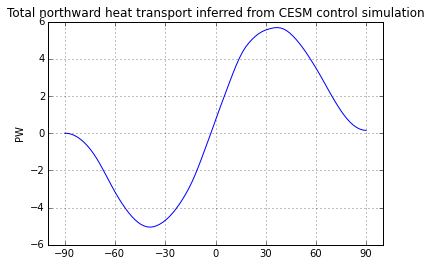

In [34]:
plt.plot(lat_cesm, inferred_heat_transport(ASR_cesm_zon - OLR_cesm_zon, lat_cesm))
plt.ylabel('PW')
plt.xticks(ticks)
plt.grid()
plt.title('Total northward heat transport inferred from CESM control simulation')

The total heat transport is very nearly symmetric about the equator, with poleward transport of about 5 to 6 PW in both hemispheres.

The transport peaks in magnitude near 35º latitude, the same latitude where we found that ASR = OLR. This is no coincidence!

Equatorward of 35º (across the tropics) there is **net heating by radiation** and **net cooling by dynamics**. The opposite is true poleward of 35º.

What about the "observations", i.e. the reanalysis data?

We can try to do the same calculation.

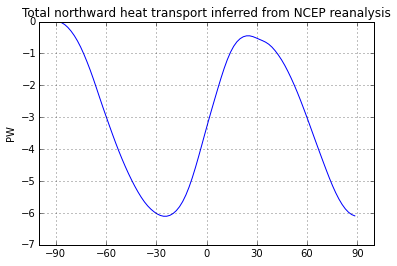

In [35]:
#  Need to flip the arrays because we want to start from the south pole
Rtoa_ncep = np.flipud(ASRzon - OLRzon)
plt.plot(np.flipud(lat_ncep), 
         inferred_heat_transport(Rtoa_ncep, 
                                 np.flipud(lat_ncep)))
plt.ylabel('PW')
plt.xticks(ticks)
plt.grid()
plt.title('Total northward heat transport inferred from NCEP reanalysis')

Our integral **does NOT go to zero at the North Pole!**. This means that the global energy budget is NOT balanced in the reanalysis data.

Let's look at the global imbalance:

In [36]:
#  global average of TOA radiation in reanalysis data
imbal_ncep = np.average(Rtoa_ncep, weights=np.cos(np.deg2rad(lat_ncep)))
print 'The net downward TOA radiation flux in NCEP renalysis data is %0.1f W/m2.' %imbal_ncep

The net downward TOA radiation flux in NCEP renalysis data is -12.0 W/m2.


Evidently there is a substantial net flux out to space in this dataset.

Before we can compute heat transport from this data, we need to **balance the global data**.

To do this requires making assumptions about the spatial distribution of the imbalance. 

The simplest assumption we can make is that the imbalance is uniform across the Earth.

In [37]:
Rtoa_ncep_balanced = Rtoa_ncep - imbal_ncep
np.average(Rtoa_ncep_balanced, weights=np.cos(np.deg2rad(lat_ncep)))

1.4701866e-06

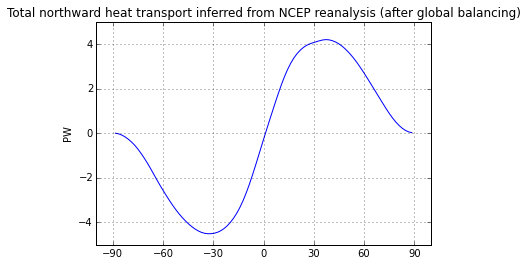

In [38]:
plt.plot(np.flipud(lat_ncep), 
         inferred_heat_transport(Rtoa_ncep_balanced, 
                                 np.flipud(lat_ncep)))
plt.ylabel('PW')
plt.xticks(ticks)
plt.grid()
plt.title('Total northward heat transport inferred from NCEP reanalysis (after global balancing)')

We now get a physically sensible result (zero at both poles).

The heat transport is poleward everywhere, and very nearly anti-symmetric across the equator. The shape is very similar to what we found from the CESM simulation, with peaks near 35º.

However the magnitude of the peaks is substantially smaller. **Does this indicate a shortcoming of the CESM simulation?**

**Probably not!**

It turns out that our result here is **very sensitive to the details** of how we balance the radiation data.

As an exercise, you might try applying different corrections other than the globally uniform correction we used above. E.g. try weighting the tropics or the mid-latitudes more strongly.

### An example of a recently published observational estimate of meridional heat transport

In [39]:
Image(url='http://www.cgd.ucar.edu/cas/Topics/PolewardTransp.png', 
      width=600)

> The ERBE period zonal mean annual cycle of the meridional energy transport in PW by (a) the atmosphere and ocean from ERBE products (b) the atmosphere based on NRA; and (c) by the ocean as implied by ERBE + NRA and GODAS. Stippling and hatching in (a)â€“(c) represent regions and times of year in which the standard deviation of the monthly mean values among estimates, some of which include the CERES period (see text), exceeds 0.5 and 1.0 PW, respectively. (d) The median annual mean transport by latitude for the total (gray), atmosphere (red), and ocean (blue) accompanied with the associated 2 range (shaded). - From Fasullo and Trenberth, 2008b.

Source: http://www.cgd.ucar.edu/cas/Topics/energybudgets.html

This figure shows the breakdown of the heat transport by **season** as well as the **partition between the atmosphere and ocean**.

Focussing just on the total, annual transport in panel (d) (black curve), we see that is quite consistent with what we computed from the CESM simulation.

____________
<a id='section6'></a>

## 6. Energy budgets for the atmosphere and ocean
____________

The total transport (which we have been inferring from the TOA radiation imbalance) includes contributions from both the **atmosphere** and the **ocean**:

$$ \mathcal{H} = \mathcal{H}_{a} + \mathcal{H}_{o} $$

We have used the TOA imbalance to infer the total transport because TOA radiation is the only significant energy source / sink to the climate system as a whole.

However, if we want to study (or model) the individual contributions from the atmosphere and ocean, we need to consider the energy budgets for each individual domain.

We will therefore need to broaden our discussion to include the **net surface heat flux**, i.e. the total flux of energy between the surface and the atmosphere.



### Surface fluxes

Let's denote the **net upward energy flux at the surface** as $F_S$.

There are four principal contributions to $F_S$:

1. Shortwave radiation
2. Longwave radiation
3. Sensible heat flux
4. Evaporation or latent heat flux

Sensible and latent heat fluxes involve turbulent exchanges in the planetary boundary layer. We will look at these in more detail later.




In [40]:
# monthly climatologies for surface flux data from reanalysis
#  all defined as positive UP
ncep_nswrs = nc.Dataset( ncep_url + "surface_gauss/nswrs.sfc.mon.1981-2010.ltm.nc" )
ncep_nlwrs = nc.Dataset( ncep_url + "surface_gauss/nlwrs.sfc.mon.1981-2010.ltm.nc" )
ncep_shtfl = nc.Dataset( ncep_url + "surface_gauss/shtfl.sfc.mon.1981-2010.ltm.nc" )
ncep_lhtfl = nc.Dataset( ncep_url + "surface_gauss/lhtfl.sfc.mon.1981-2010.ltm.nc" )

In [41]:
#  Calculate ANNUAL AVERAGE net upward surface flux
ncep_net_surface_up = np.mean(ncep_nlwrs.variables['nlwrs'][:]
                             + ncep_nswrs.variables['nswrs'][:]
                             + ncep_shtfl.variables['shtfl'][:]
                             + ncep_lhtfl.variables['lhtfl'][:],
                             axis=0)

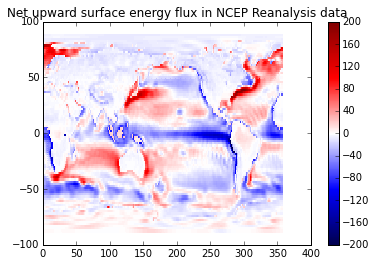

In [42]:
plt.pcolormesh(lon_ncep, lat_ncep, ncep_net_surface_up, 
               cmap=plt.cm.seismic, vmin=-200., vmax=200. )
plt.colorbar()
plt.title('Net upward surface energy flux in NCEP Reanalysis data')

Discuss...  Large net fluxes over ocean, not over land.

### Energy budget for the ocean

Using exactly the same reasoning we used for the whole climate system, we can write a budget for the OCEAN ONLY:

$$ \frac{\partial E_o}{\partial t} = -F_S - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H_o}}{\partial \phi} $$

In principle it is possible to calculate $\mathcal{H}_o$ from this budget, analagously to how we calculated the total $\mathcal{H}$.

Assuming that

- surface fluxes are well-known
- the ocean heat storage is negligible (a big assumption!)

we can write

$$ \mathcal{H}_o(\phi) = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} - \cos⁡\phi^\prime ~ F_S d\phi^\prime  $$

where the minus sign account for the fact that we defined $F_S$ as **positive up** (out of the ocean).



### Energy budget for the atmosphere

The net energy source to the atmosphere is the sum of the TOA flux and the surface flux. Thus we can write

$$ \frac{\partial E_a}{\partial t} = R_{TOA} + F_S - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H_a}}{\partial \phi} $$

and we can similarly integrate to get the transport:

$$ \mathcal{H}_a(\phi) = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ \big( R_{TOA} + F_S \big) d\phi^\prime  $$

Note that these formulas ensure that $\mathcal{H} = \mathcal{H}_a + \mathcal{H}_o$.

### Water budget for the atmosphere

Water vapor contributes to the atmopsheric energy transport because energy consumed through evaporation is converted back to sensible heat wherever the vapor subsequently condenses. If the evaporation and the condensation occur at different latitudes then there is a net transport of energy due to the movement of water vapor.

We can use the same kind of budget reasoning to compute this **latent heat transport**. But this time we will make a budget for water vapor only.

The only sources and sinks of water vapor to the atmosphere are surface evaporation and precipitation:

$$ L_v \frac{\partial Q}{\partial t} = L_v \big( Evap - Precip \big) - \frac{1}{2 \pi a^2  \cos⁡\phi } \frac{\partial \mathcal{H}_{LH}}{\partial \phi} $$

Here we are using

- $Q$ is the depth-integrated water vapor (the "precipitable water") in kg m$^{-2}$
- Evap and Precip are in kg m$^{-2}$ s$^{-1}$ (equivalent to mm/s)
- $L_v = 2.5 \times 10^6$ J kg$^{-1}$ is the latent heat of vaporization
- $\mathcal{H}_{LH}$ is the northward latent heat transport

All terms in the above equation thus have units of W m$^{-2}$.

Using the now-familiar equilibrium reasoning, we can use this water balance to compute the latent heat transport from the net surface evaporation minus precipitation:

$$ \mathcal{H}_{LH}(\phi) = 2 \pi ~a^2 \int_{-\pi/2}^{\phi} \cos⁡\phi^\prime ~ L_v ~\big( Evap - Precip \big) d\phi^\prime  $$

From this we can then infer all the energy transport associated with the motion of dry air as a residual:

$$\mathcal{H}_{Dry} = \mathcal{H}_a - \mathcal{H}_{LH} $$

____________
<a id='section7'></a>

## 7. Calculating the partitioning of poleward energy transport into different components
____________



This function implements the above formulas to calculate the following quantities from CESM simulation output:

- Total heat transport, $\mathcal{H}$
- Ocean heat transport, $\mathcal{H}_o$
- Atmospheric heat transport, $\mathcal{H}_a$
- Atmospheric latent heat transport, $\mathcal{H}_{LH}$
- Atmospheric dry heat transport, $\mathcal{H}_{Dry}$

In [43]:
def CESM_heat_transport(ncdata):
    lat = ncdata.variables['lat'][:]
    # TOA radiation
    OLR = np.mean(ncdata.variables['FLNT'][:], axis=2)
    ASR = np.mean(ncdata.variables['FSNT'][:], axis=2)
    Rtoa = ASR - OLR  # net downwelling radiation
    #  surface fluxes  (all positive UP)
    LHF = np.mean(ncdata.variables['LHFLX'][:], axis=2)  # latent heat flux (evaporation)
    SHF = np.mean(ncdata.variables['SHFLX'][:], axis=2) # sensible heat flux
    LWsfc = np.mean(ncdata.variables['FLNS'][:], axis=2)  # net longwave radiation at surface
    SWsfc = -np.mean(ncdata.variables['FSNS'][:], axis=2)  # net shortwave radiation at surface
    #  energy flux due to snowfall
    SnowFlux =  np.mean(ncdata.variables['PRECSC'][:]+
                        ncdata.variables['PRECSL'][:], axis=2)*const.rho_w*const.Lhfus
    #  hydrological cycle
    Evap = np.mean(ncdata.variables['QFLX'][:], axis=2)  # kg/m2/s or mm/s
    Precip = np.mean(ncdata.variables['PRECC'][:]+
                    ncdata.variables['PRECL'][:], axis=2)*const.rho_w  # kg/m2/s or mm/s
    EminusP = Evap - Precip  # kg/m2/s or mm/s
    SurfaceRadiation = LWsfc + SWsfc  # net upward radiation from surface
    SurfaceHeatFlux = SurfaceRadiation + LHF + SHF + SnowFlux  # net upward surface heat flux
    Fatmin = Rtoa + SurfaceHeatFlux  # net heat flux in to atmosphere
    # heat transport terms
    HTmonthly = {}
    HTmonthly['total'] = inferred_heat_transport(Rtoa, lat)
    HTmonthly['atm'] = inferred_heat_transport(Fatmin, lat)
    HTmonthly['ocean'] = inferred_heat_transport(-SurfaceHeatFlux, lat)
    HTmonthly['latent'] = inferred_heat_transport(EminusP*const.Lhvap, lat) # atm. latent heat transport from moisture imbal.
    HTmonthly['dse'] = HTmonthly['atm'] - HTmonthly['latent']  # dry static energy transport as residual

    #  annual averages
    HTann = {}
    for name, value in HTmonthly.iteritems():
        HTann[name] = np.mean(value, axis=0)
        
    return HTann, HTmonthly

In [44]:
#  Compute heat transport partition for both control and 2xCO2 simulations
HT_control, _ = CESM_heat_transport(atm_control)
HT_2xCO2, _ = CESM_heat_transport(atm_2xCO2)

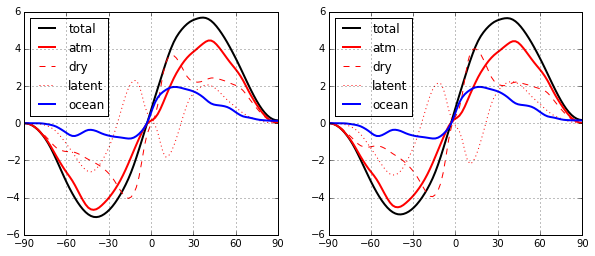

In [45]:
fig = plt.figure(figsize=(10,4))
runs = [HT_control, HT_2xCO2]
N = len(runs)

for n, HT in enumerate([HT_control, HT_2xCO2]):
    ax = fig.add_subplot(1, N, n+1)
    ax.plot(lat_cesm, HT['total'], 'k-', label='total', linewidth=2)
    ax.plot(lat_cesm, HT['atm'], 'r-', label='atm', linewidth=2)
    ax.plot(lat_cesm, HT['dse'], 'r--', label='dry')
    ax.plot(lat_cesm, HT['latent'], 'r:', label='latent')
    ax.plot(lat_cesm, HT['ocean'], 'b-', label='ocean', linewidth=2)

    ax.set_xlim(-90,90)
    ax.set_xticks(ticks)
    ax.legend(loc='upper left')
    ax.grid()

Discuss the shape of these curves.

Actually very very similar before and after the global warming.

____________
<a id='section8'></a>

## 8. Mechanisms of heat transport
____________



Energy is transported across latitude lines whenever there is an exchange of fluids with different energy content: e.g. warm fluid moving northward while colder fluid moves southward.

Thus energy transport always involves **correlations between northward component of velocity $v$ and energy $e$**

The transport is an integral of these correlations, around a latitude circle and over the depth of the fluid:

$$ \mathcal{H} = \int_0^{2\pi} \int_{\text{bottom}}^{\text{top}} \rho ~ v ~ e ~ dz ~ a \cos\phi ~ d\lambda$$

The total transport (which we have been inferring from the TOA radiation imbalance) includes contributions from both the **atmosphere** and the **ocean**:

$$ \mathcal{H} = \mathcal{H}_{a} + \mathcal{H}_{o} $$

We can apply the above definition to both fluids (with appropriate values for bottom and top in the depth integral).

The appropriate measure of energy content is different for the atmosphere and ocean.

For the ocean, we usually use the **enthalpy for an incompressible fluid**:

$$ e_o \approx c_w ~ T $$

where $c_w \approx 4.2$ J kg$^{-1}$ K$^{-1}$ is the specific heat for seawater.

For the atmosphere, it's a bit more complicated. We need to account for both the compressibility of air, and for its water vapor content. This is because of the latent energy associated with evaporation and condensation of vapor.

It is convenient to define the **moist static energy** for the atmosphere:

$$ MSE = c_p ~T + g~ Z + L_v ~q  $$

whose terms are respectively the internal energy, the potential energy, and the latent heat of water vapor (see texts on atmopsheric thermodynamics for details).

We will assume that $MSE$ is a good approximation to the total energy content of the atmosphere, so

$$ e_a \approx MSE $$

Note that in both cases we have **neglected the kinetic energy** from this budget.

The kinetic energy per unit mass is $e_k = |\vec{v}|^2/2$, where $\vec{v} = (u,v,w)$ is the velocity vector.

In practice it is a very small component of the total energy content of the fluid and is usually neglected in analyses of poleward energy transport.

We can further divide the atmospheric transport into transports due to the movement of **dry air** and transport associated with evaporation and condensation of **water vapor**.

### Mechanisms of energy transport in the ocean

Assuming the ocean extends from $z=-H$ to $z=0$ we can then write

$$ \mathcal{H}_o \approx a \cos\phi \int_0^{2\pi} \int_{-H}^{0}  c_w ~\rho ~ v ~ T ~ dz  ~ d\lambda$$

setting $v ~ T = 0$ at all land locations around the latitude circle.

The northward transport $\mathcal{H}_o$ is positive if there is a net northward flow of warm water and southward flow of cold water.

This can occur due to **horizontal** differences in currents and temperatures.

The classic example is flow in the subtropical gyres and western boundary currents. In the subtropical North Atlantic, there is rapid northward flow of warm water in the Gulf Stream. This is compensated by a slow southward flow of cooler water across the interior of the basin. 

**Because the water masses are at different temperatures, equal and opposite north-south exchanges of mass result in net northward transport of energy.**

Energy transport can also result from **vertical** structure of the currents.

There is a large-scale **overturning circulation** in the Atlantic that involves near-surface northward flow of warmer water, compensated by deeper southward flow of colder water.

Again, equal exchange of water but net transport of energy.

<div class="alert alert-success">
[Back to ATM 623 notebook home](../index.ipynb)
</div>

____________
## Credits

The author of this notebook is [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html), University at Albany.

It was developed in support of [ATM 623: Climate Modeling](http://www.atmos.albany.edu/facstaff/brose/classes/ATM623_Spring2015/), a graduate-level course in the [Department of Atmospheric and Envionmental Sciences](http://www.albany.edu/atmos/index.php), offered in Spring 2015.
____________

____________
## Version information
____________


In [46]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, climlab

Installed version_information.py. To use it, type:
  %load_ext version_information


Software versions
Python 2.7.9 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.0.0
OS Darwin 13.4.0 x86_64 i386 64bit
numpy 1.9.2
climlab 0.2.5
Thu Apr 02 14:38:57 2015 EDT